# Breast Cancer prediction  
### Table of Contents:

- [Introduction](#Introduction)
- [Data Import and Cleaning](#Data-Import-and-Cleaning)
   - [Import](#Import)
   - [Inspect](#Inspect)
   - [Missing and unnecessary values](#Missing-and-unnecessary-values)
   - [Encoding](#Encoding)
- [Scaling](#Scaling)
- [EDA (Exploratory Data Analysis)](#EDA-Exploratory-Data-Analysis)
   - [Distributions](#Distributions)
   - [Correlation](#Correlation)
- [Feature Selection](#Feature-Selection)
   - [Correlation-based Feature Selection](#Correlation-based-Feature-Selection)
   - [Recursive Feature Elimination](#Recursive-Feature-Elimination)
   - [Univariate Feature Selection](#Univariate-Feature-Selection)
   - [Feature Extraction with PCA (Principal Component Analysis)](#Feature-Extraction-with-PCA-(Principal-Component-Analysis))
- [Build model, tune hyperparameters](#Build-model,-tune-hyperparameters)
- [Evaluate Model](#Evaluate-Model)


## [Introduction](#Introduction)  
We will try to predict if sample is benign or malignant given measurements of nuclear shape.

### Data set
We will use one of the popular data sets in sklearn.

In this data set features were computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

This data set is further described further here:  
https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic  
https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

### Decision Trees

For this project we will use a Decision Tree model

A decision tree is a supervised machine learning model used for both classification and regression tasks. It makes decisions based on a series of rules, where each internal node represents a decision based on a feature, each branch represents the outcome of the decision, and each leaf node represents the final prediction or the target variable.

Decision trees are suitable for cancer prediction due to their interpretability, feature importance analysis, and ability to handle non-linear relationships. However, they are susceptibile to overfitting and sensitive to small changes in the data.

## [Data Import and Cleaning](#Data-Import-and-Cleaning)  
### [Import](#Import)


In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, RFE, chi2
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [2]:
relative_path = 'Breast Cancer Wisconsin (Diagnostic) Data Set.csv'
file_path = os.path.join(os.getcwd(),relative_path)

df = pd.read_csv(file_path)

### [Inspect](#Inspect)  

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

### [Missing and unnecessary values](#Missing-and-unnecessary-values)

In [7]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [8]:
df = df.drop(['Unnamed: 32', 'id'], axis=1)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### [Encoding](#Encoding)
Chaniging categorical data into numerical is not necesary for Decision trees. However for practise we may do it.

We will change the categorical data into numerical ones. We could use Label Encoding since there is an ordinal relationship between 'M' and 'B'. But since we want to know what value was assigned to each category and the number of categories is small we can do it manually

In [9]:
# Label encoder
# encoder = LabelEncoder()
# df['diagnosis'] = encoder.fit_transform(df['diagnosis'])

# df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

## [Scaling](#Scaling)  

We will now transform the data so it shares a common scale. WE will use ............ technique as ........

In [10]:
df.columns

X = df.drop('diagnosis', axis=1)
y = df.diagnosis

In [11]:
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

## [EDA (Exploratory Data Analysis)](#EDA-Exploratory-Data-Analysis)
### [Distributions](#Distributions)

diagnosis
B    357
M    212
Name: count, dtype: int64


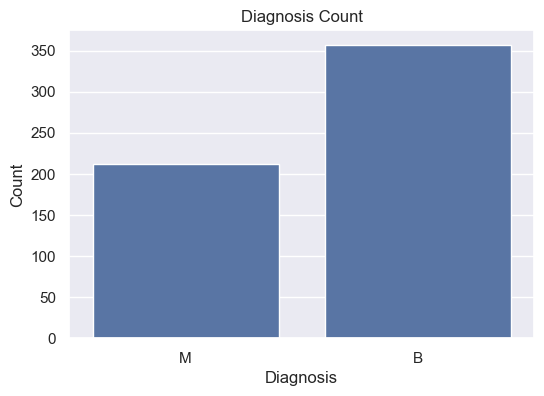

In [12]:
print(df['diagnosis'].value_counts())

sns.set(style='darkgrid')
plt.figure(figsize=(6,4))

plot_diagnosis = sns.countplot(x='diagnosis', data=df)
plot_diagnosis.set(xlabel='Diagnosis', ylabel='Count', title='Diagnosis Count')

plt.show()


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

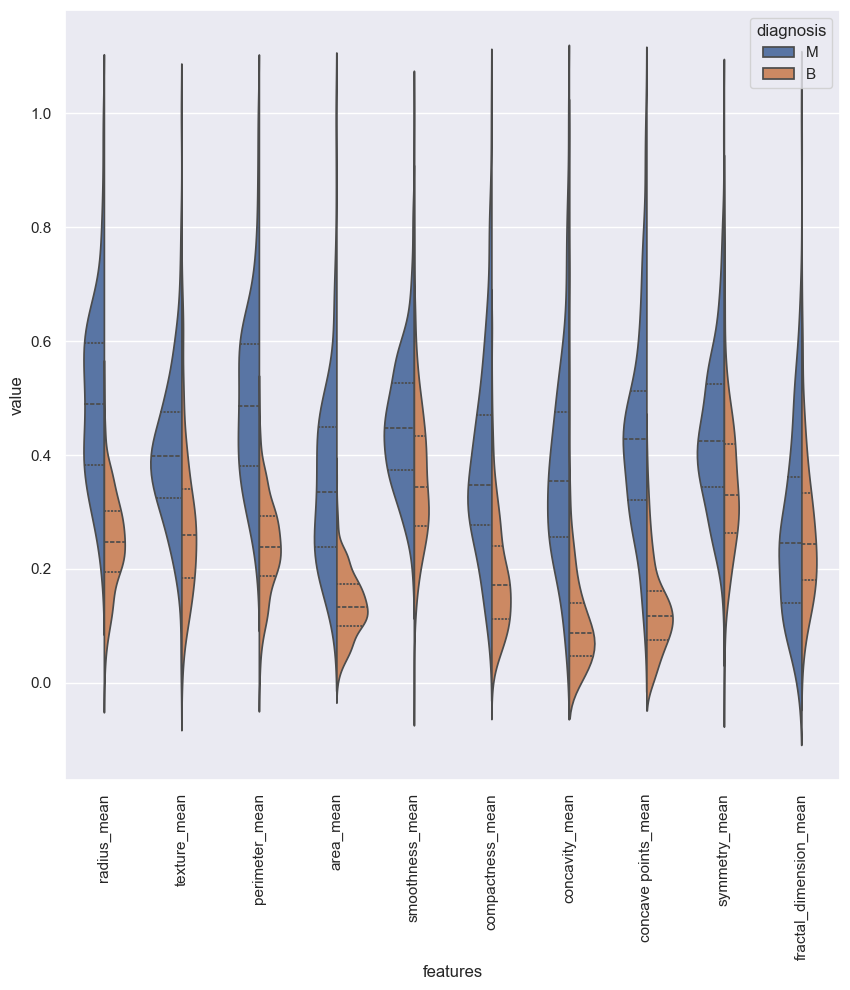

In [13]:
X_norm_df = pd.DataFrame(X_norm, columns=X.columns)

data = pd.concat([y, X_norm_df.iloc[:, 0:10]], axis=1)
data = pd.melt(data, id_vars="diagnosis",
               var_name="features",
               value_name='value')
plt.figure(figsize=(10, 10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=90)

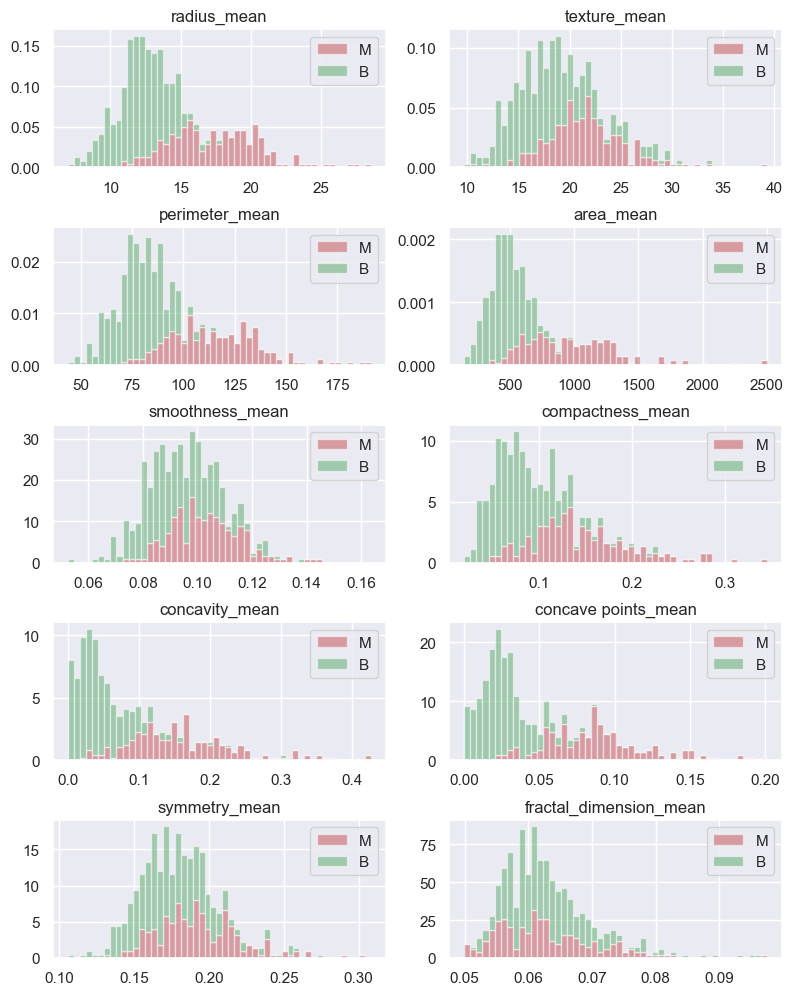

In [20]:
# List of features
features_mean = list(df.columns[1:11])

# Separate data based on diagnosis
dfM = df[df['diagnosis'] == 'M']
dfB = df[df['diagnosis'] == 'B']

# Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))
axes = axes.ravel()

for idx, ax in enumerate(axes):
    binwidth = (max(df[features_mean[idx]]) - min(df[features_mean[idx]])) / 50
    ax.hist([dfM[features_mean[idx]], dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth), alpha=0.5, stacked=True, density=True, label=['M', 'B'], color=['r', 'g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])

plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

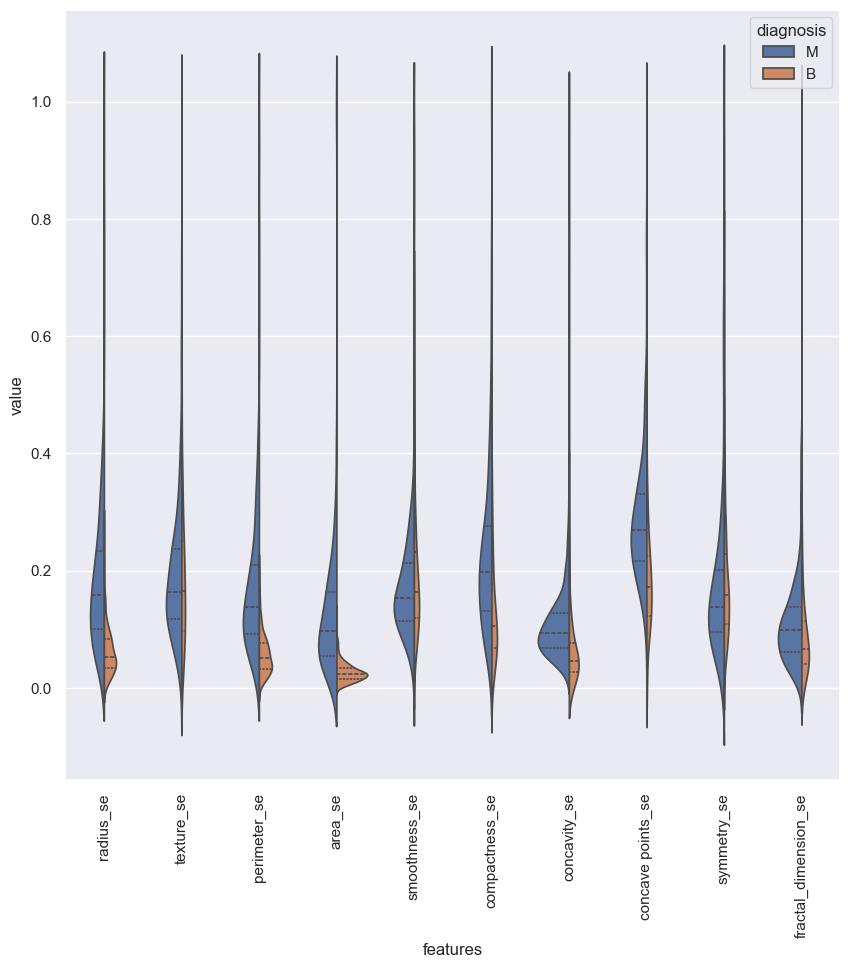

In [ ]:
data = pd.concat([y, X_norm_df.iloc[:, 10:20]], axis=1)
data = pd.melt(data, id_vars="diagnosis",
               var_name="features",
               value_name='value')
plt.figure(figsize=(10, 10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=90)

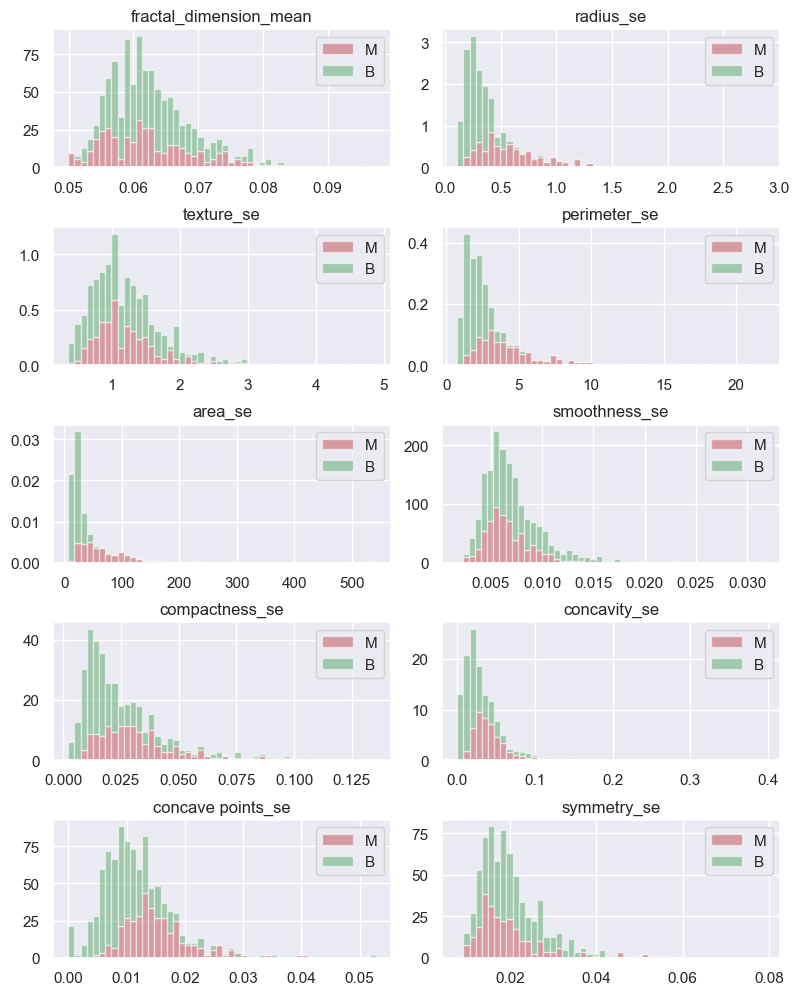

In [21]:
# List of features
features_mean = list(df.columns[10:20])

# Separate data based on diagnosis
dfM = df[df['diagnosis'] == 'M']
dfB = df[df['diagnosis'] == 'B']

# Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))
axes = axes.ravel()

for idx, ax in enumerate(axes):
    binwidth = (max(df[features_mean[idx]]) - min(df[features_mean[idx]])) / 50
    ax.hist([dfM[features_mean[idx]], dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth), alpha=0.5, stacked=True, density=True, label=['M', 'B'], color=['r', 'g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])

plt.tight_layout()
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

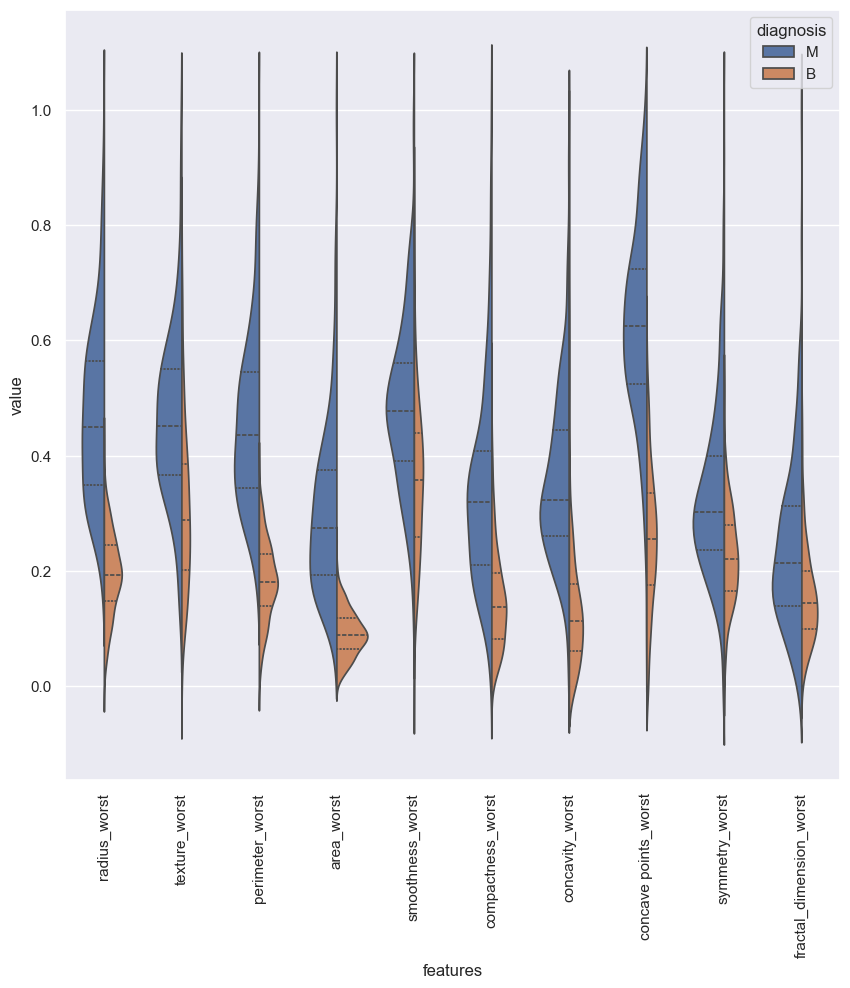

In [ ]:
data = pd.concat([y, X_norm_df.iloc[:, 20:30]], axis=1)
data = pd.melt(data, id_vars="diagnosis",
               var_name="features",
               value_name='value')
plt.figure(figsize=(10, 10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=90)

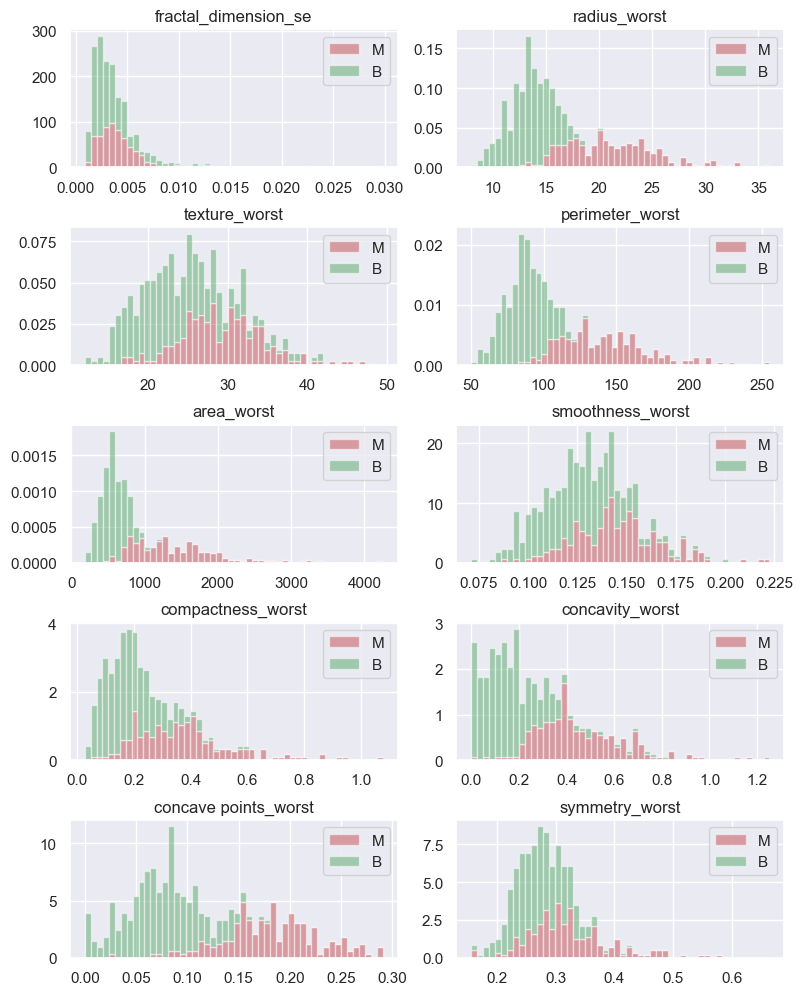

In [22]:
# List of features
features_mean = list(df.columns[20:30])

# Separate data based on diagnosis
dfM = df[df['diagnosis'] == 'M']
dfB = df[df['diagnosis'] == 'B']

# Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 10))
axes = axes.ravel()

for idx, ax in enumerate(axes):
    binwidth = (max(df[features_mean[idx]]) - min(df[features_mean[idx]])) / 50
    ax.hist([dfM[features_mean[idx]], dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth), alpha=0.5, stacked=True, density=True, label=['M', 'B'], color=['r', 'g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])

plt.tight_layout()
plt.show()

WE see that an overarching trend is that the melignant type is consistently skewed for most features.

In [ ]:
# sns.pairplot(df)
# plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3398: UserWarning: 20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3398: UserWarning: 21.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3398: UserWarning: 31.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3398: UserWarning: 26.2% of the points cannot be placed; you may want to decrease the size of the markers or use s

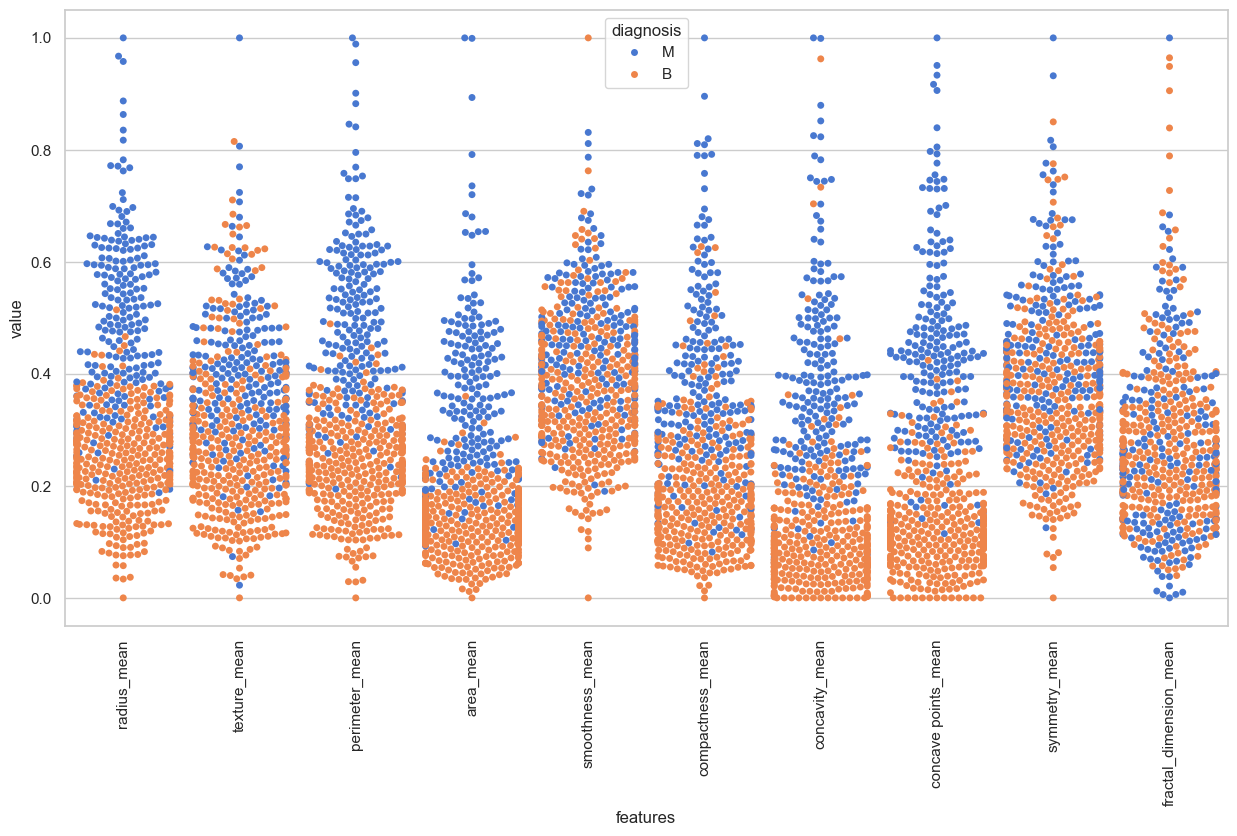

In [ ]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = X_norm_df
data = pd.concat([y, X_norm_df.iloc[:, 0:10]], axis=1)
data = pd.melt(data, id_vars="diagnosis",
                var_name="features",
                value_name='value')
plt.figure(figsize=(15, 8))  # Adjust the figure size
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3398: UserWarning: 49.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3398: UserWarning: 35.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3398: UserWarning: 54.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/categorical.py:3398: UserWarning: 63.3% of the points cannot be placed; you may want to decrease the size of the markers or use s

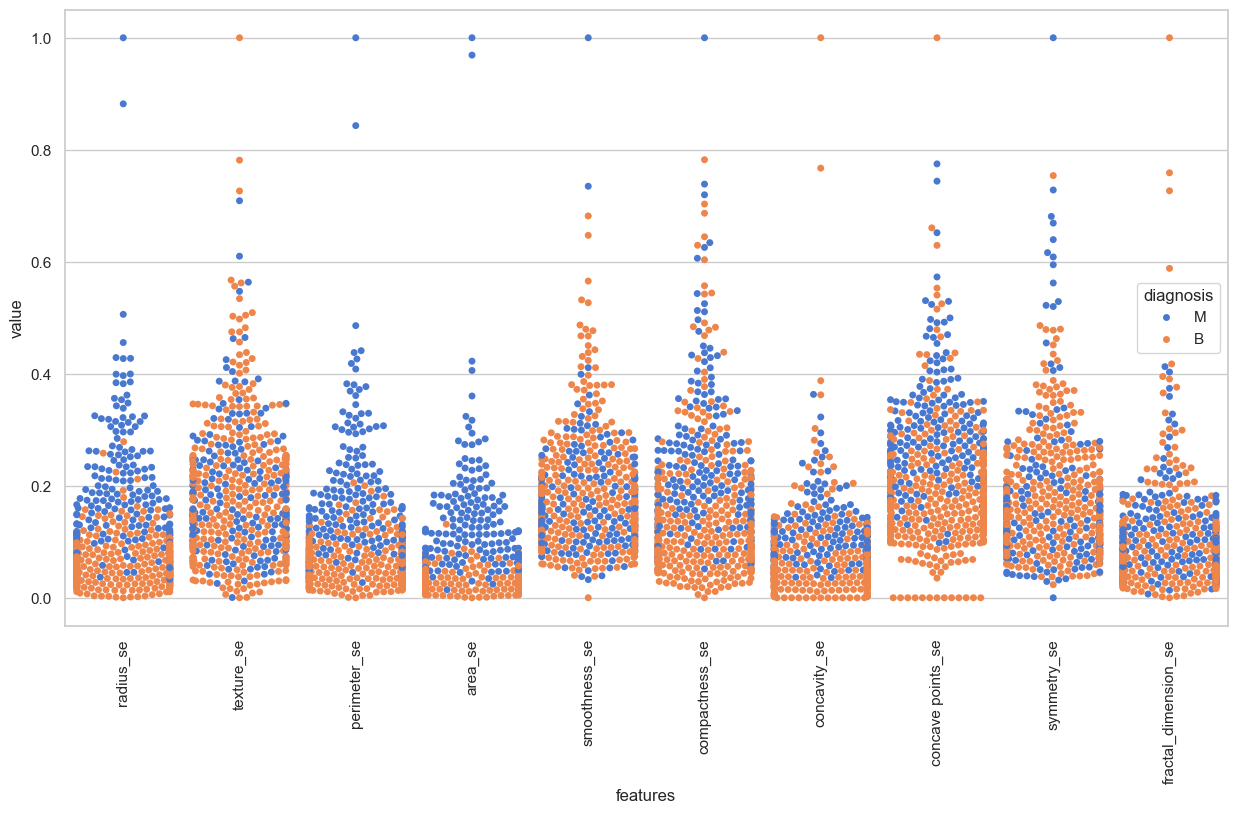

In [ ]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = X_norm_df
data = pd.concat([y, X_norm_df.iloc[:, 10:20]], axis=1)
data = pd.melt(data, id_vars="diagnosis",
                var_name="features",
                value_name='value')
plt.figure(figsize=(15, 8))  # Adjust the figure size
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
plt.show()

In [ ]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = X_norm_df
data = pd.concat([y, X_norm_df.iloc[:, 20:30]], axis=1)
data = pd.melt(data, id_vars="diagnosis",
                var_name="features",
                value_name='value')
plt.figure(figsize=(15, 8))  # Adjust the figure size
#tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)
plt.show()

#print("swarm plot time: ", toc-tic ," s")

## [Correlation](#Correlation)

<Axes: >

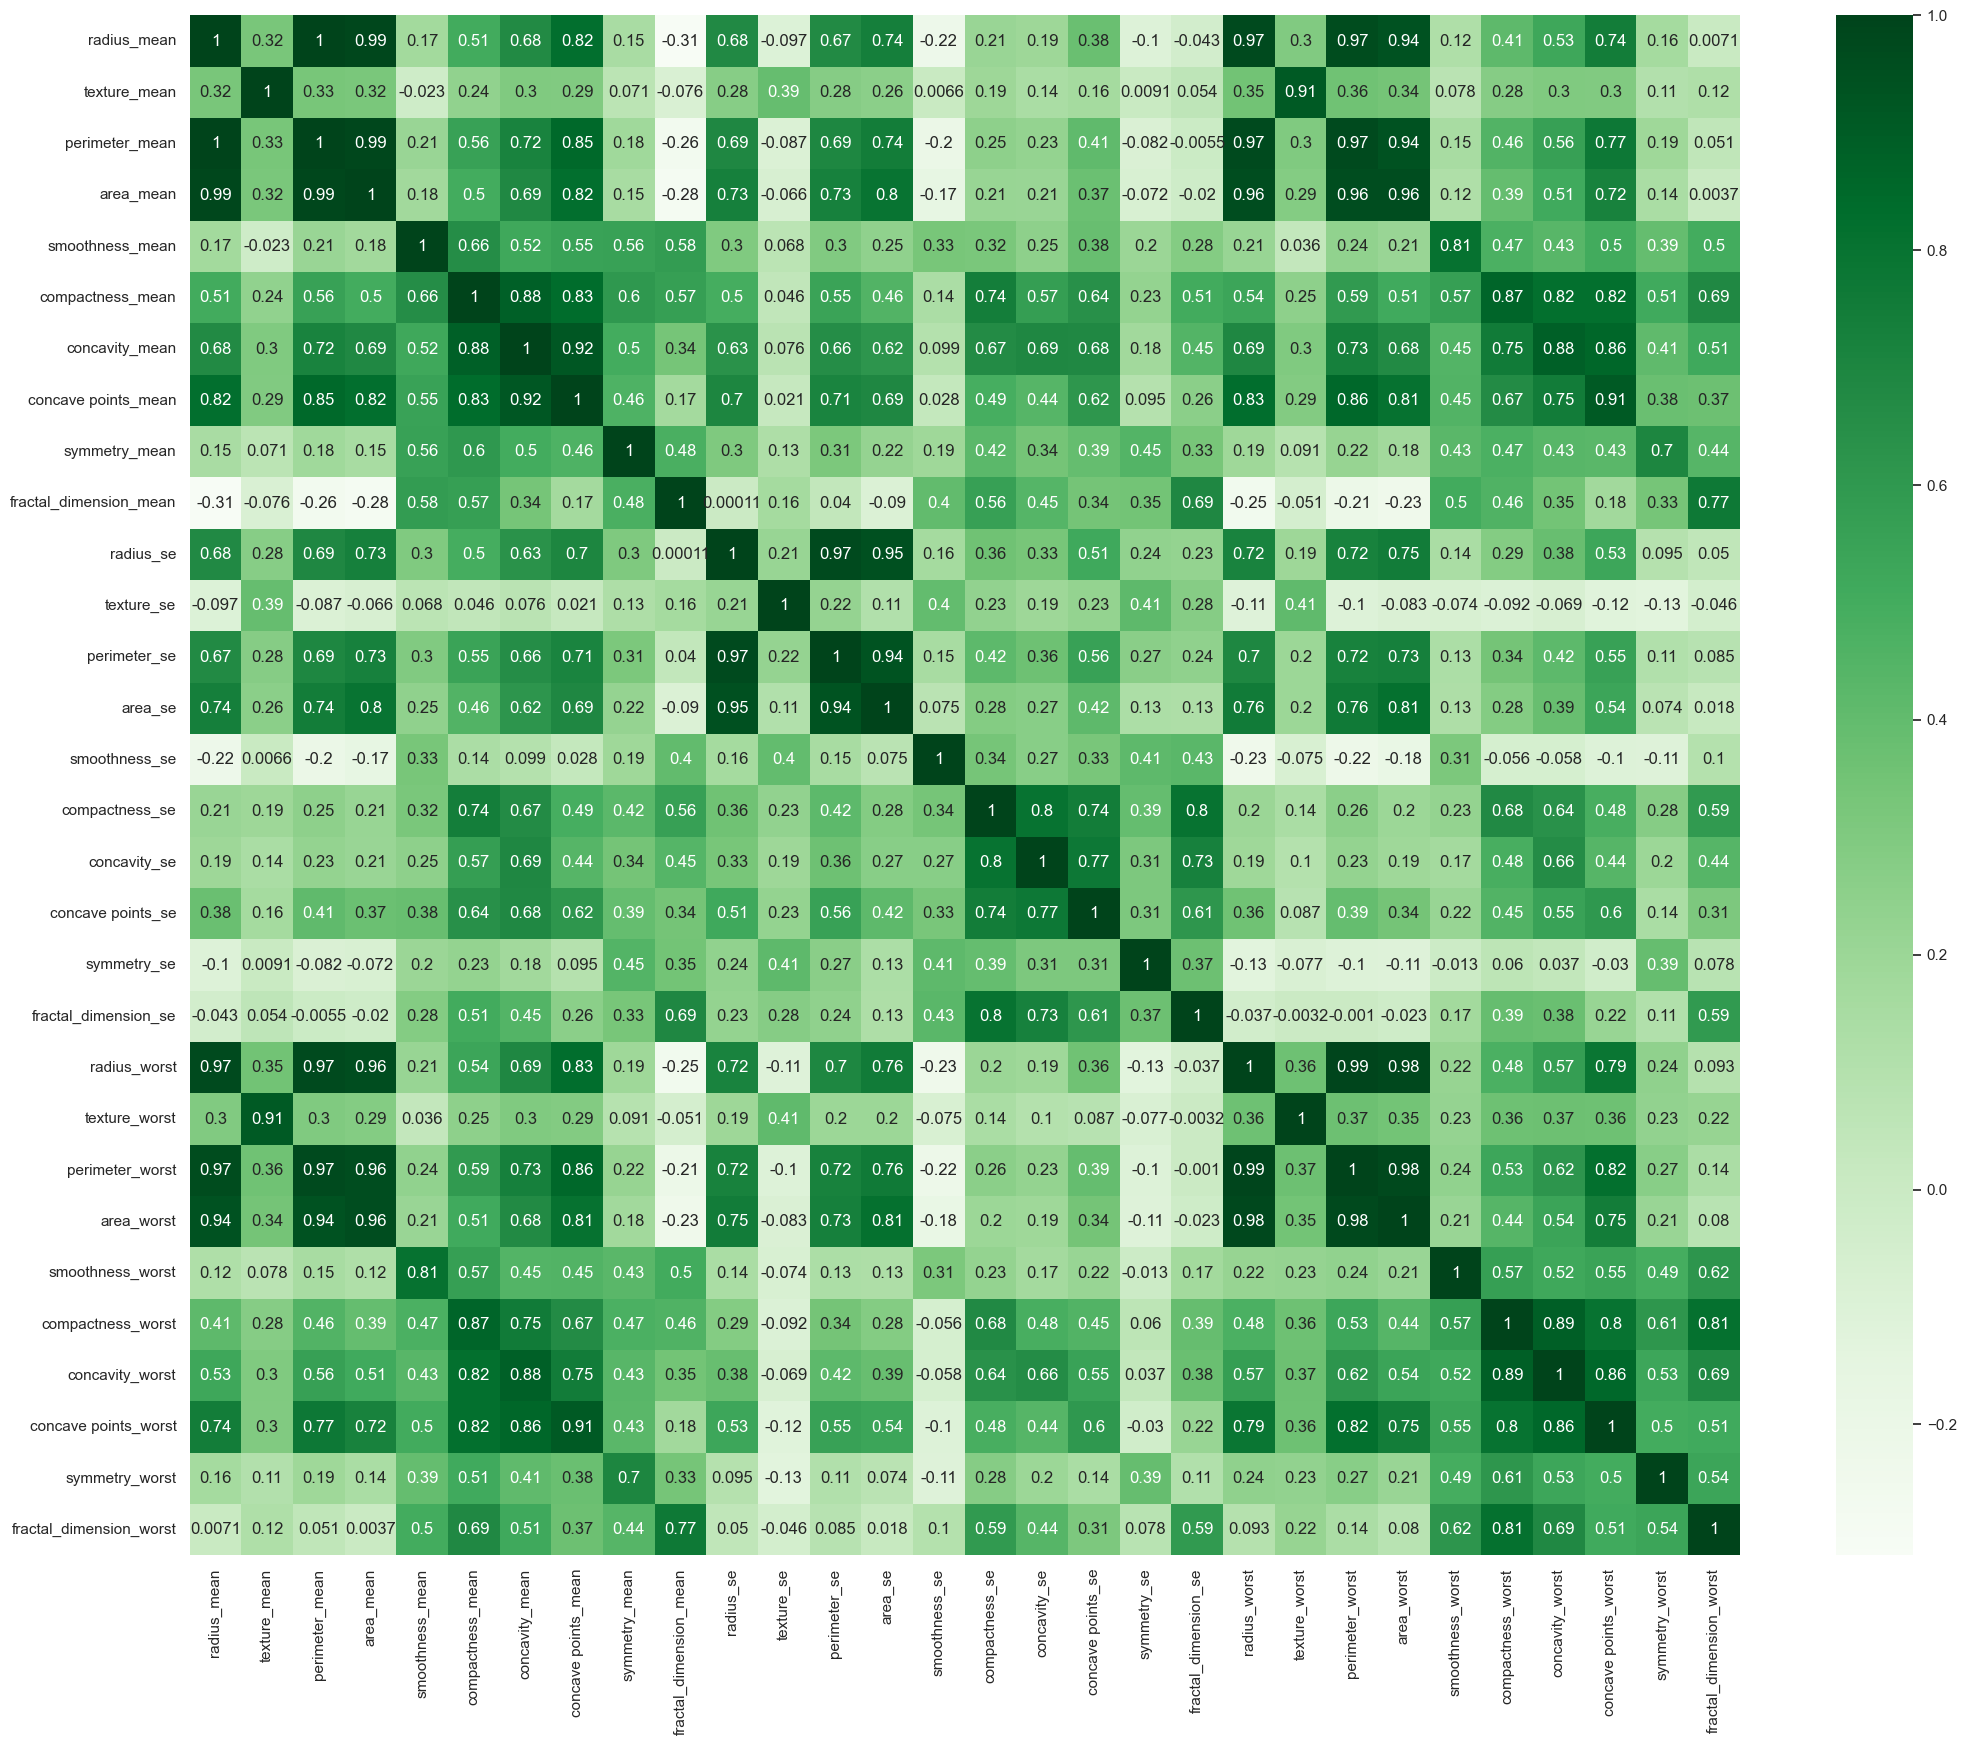

In [ ]:
corr = X_norm_df.corr()
fig , ax = plt.subplots(figsize=(25 , 20))
sns.heatmap(corr ,annot= True , ax=ax , cmap= 'Greens')

- radius_mean, perimeter_mean and area_mean are correlated with each other
- Compactness_mean, concavity_mean and concave points_mean are correlated with each other
- radius_se, perimeter_se and area_se are correlated
- radius_worst, perimeter_worst and area_worst are correlated
- Compactness_worst, concavity_worst and concave points_worst are correlated
- Compactness_se, concavity_se and concave points_se are correlated
- texture_mean and texture_worst are correlated
- area_worst and area_mean are correlated

## [Feature Selection](#Feature-Selection)
### [Correlation-based Feature Selection](#Correlation-based-Feature-Selection)

Correlation-based Feature Selection is a technique that involves selecting features based on their correlation with the target variable. The basic idea is to retain features that have a high correlation with the target while eliminating features that have low or no correlation. This approach assumes that features with stronger correlations are more likely to be informative for predicting the target variable.

Multicollinearity occurs when two or more features in a model are highly correlated, making it difficult to separate their individual effects on the target variable. This can lead to unstable coefficient estimates and reduced interpretability. So we will drop those features that are highly corelated leaving only one from each group.

In [ ]:
drop_list1 = ['radius_mean', 'perimeter_mean', 'compactness_mean', 'concavity_mean', 'radius_se', 'perimeter_se', 'radius_worst', 'perimeter_worst', 'concavity_worst', 'concave points_worst', 'area_worst', 'texture_worst', 'concavity_se', 'concave points_se']
drop_list1 = list(set(drop_list1))

X_norm_df_2 = X_norm_df.drop(drop_list1, axis=1)
X_norm_df_2.head()

,texture_mean,area_mean,smoothness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,symmetry_worst,fractal_dimension_worst
0,0.022658,0.363733,0.593753,0.731113,0.686364,0.605518,0.120469,0.273811,0.159296,0.351398,0.311645,0.183042,0.601136,0.619292,0.598462,0.418864
1,0.272574,0.501591,0.289880,0.348757,0.379798,0.141323,0.082589,0.125660,0.119387,0.081323,0.084539,0.091110,0.347553,0.154563,0.233590,0.222878
2,0.390260,0.449417,0.514309,0.635686,0.509596,0.211247,0.094303,0.162922,0.150831,0.283955,0.205690,0.127006,0.483590,0.385375,0.403706,0.213433
3,0.360839,0.102906,0.811321,0.522863,0.776263,1.000000,0.175875,0.038155,0.251453,0.543215,0.728148,0.287205,0.915472,0.814012,1.000000,0.773711
4,0.156578,0.489290,0.430351,0.518390,0.378283,0.186816,0.093065,0.163688,0.332359,0.167918,0.136179,0.145800,0.437364,0.172415,0.157500,0.142595


<Axes: >

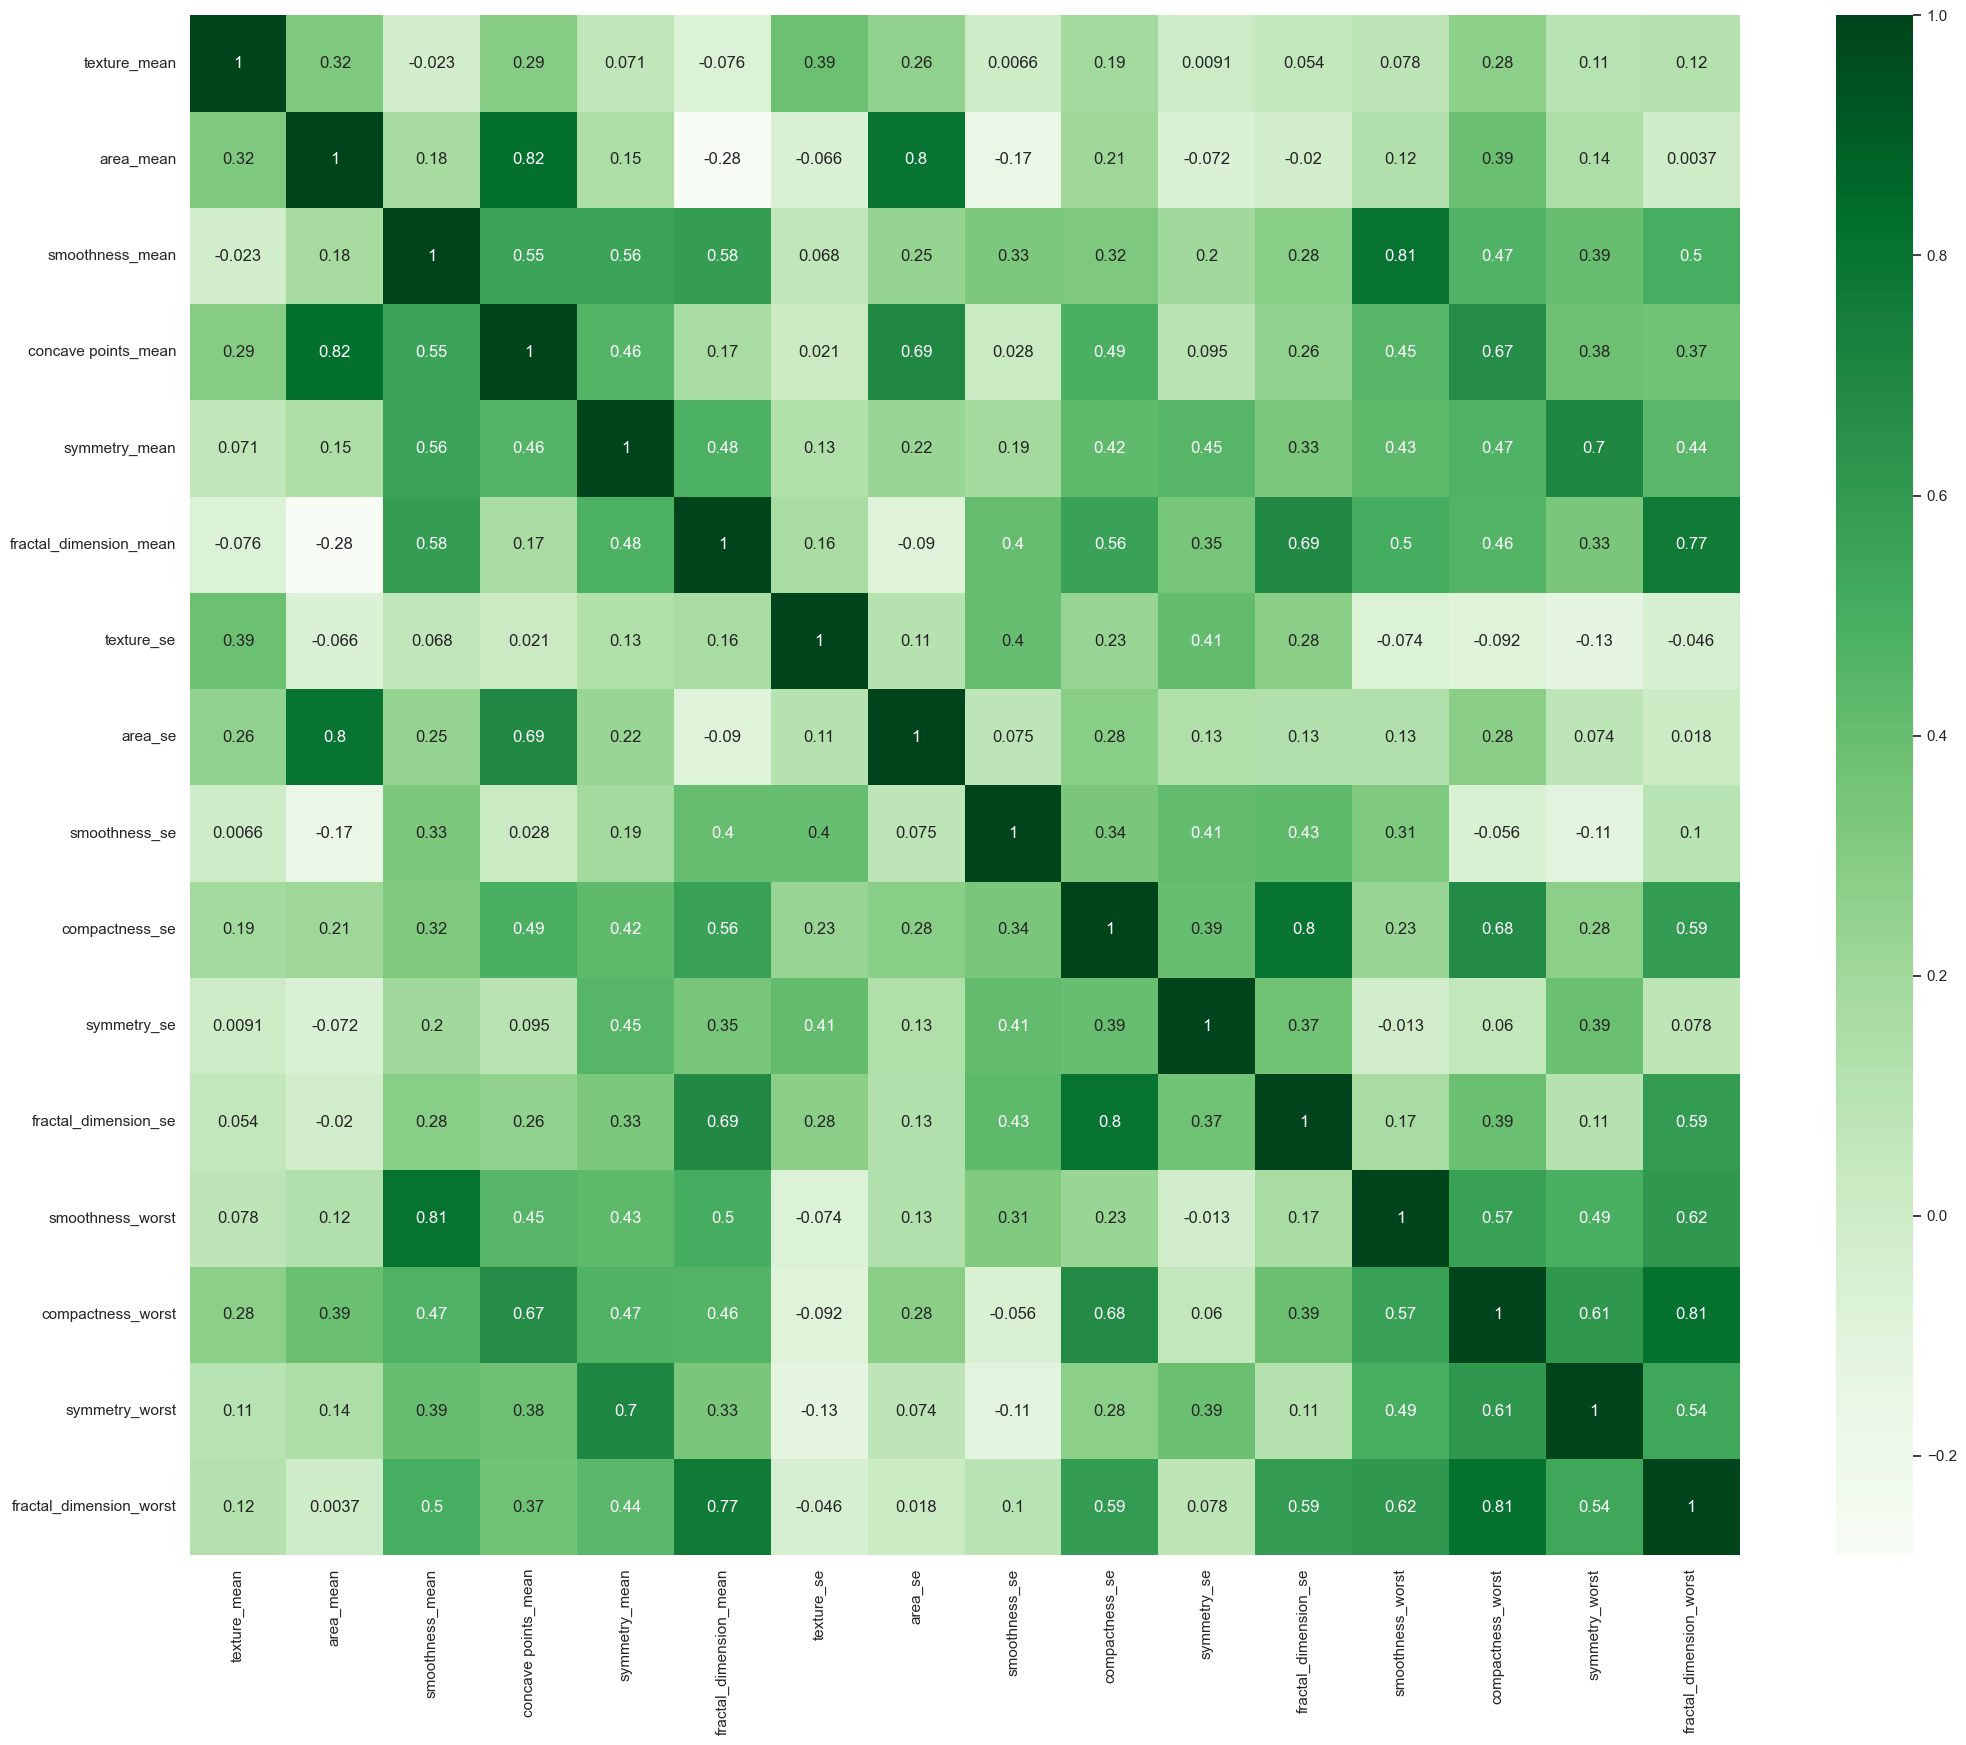

In [ ]:
corr = X_norm_df_2.corr()
fig , ax = plt.subplots(figsize=(25 , 20))
sns.heatmap(corr ,annot= True , ax=ax , cmap= 'Greens')

### [Recursive Feature Elimination](#Recursive-Feature-Elimination)
Recursive Feature Elimination (RFE) is a feature selection technique that systematically removes less important features from the dataset. It works by recursively fitting a model, evaluating feature importance, and eliminating the least important feature in each iteration until the desired number of features is reached. The goal is to retain the most relevant subset of features for optimal model performance.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, random_state=42)
model = DecisionTreeClassifier(random_state=42)

best_n = 0
features_RFE = []
best_accuracy_score = 0
accuracy_scores = []

for n in range(2, len(X_norm_df.columns)+1):
    # Initialize RFE
    rfe = RFE(model, n_features_to_select=n)

    # Fit RFE to training data
    fit = rfe.fit(X_train, y_train)

    #features selected by RFE
    selected_features = [index for index, support in enumerate(fit.support_) if support]
    #print("Selected Features:", selected_features)

    #Evaluate
    # Evaluate the model using the selected features on the test set
    X_train_rfe = rfe.transform(X_train)
    X_test_rfe = rfe.transform(X_test)

    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_test_rfe)

    accuracy = accuracy_score(y_test, y_pred)

    accuracy_scores.append(accuracy)

    if best_accuracy_score == 0:
        best_accuracy_score = accuracy
        best_n = n
        features_RFE = [index for index, support in enumerate(fit.support_) if support]

    else:
        if accuracy > best_accuracy_score:
            best_accuracy_score = accuracy
            best_n = n
            features_RFE = [index for index, support in enumerate(fit.support_) if support]

print(f'best n: {best_n}, with accuracy: {best_accuracy_score} and features: {features_RFE}')

best n: 28, with accuracy: 0.958041958041958 and features: [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


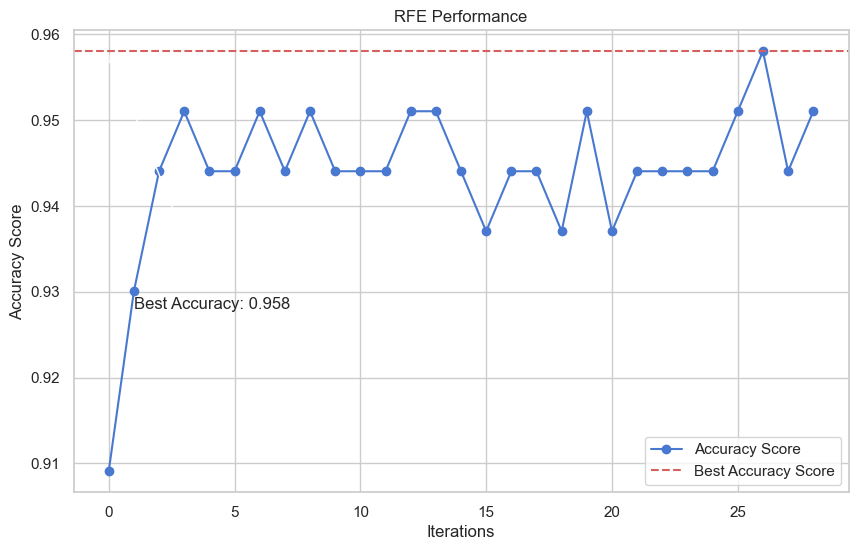

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(accuracy_scores, marker='o', linestyle='-', color='b', label='Accuracy Score')
plt.axhline(y=best_accuracy_score, color='r', linestyle='--', label='Best Accuracy Score')

# Annotate the best accuracy score
plt.annotate(f'Best Accuracy: {best_accuracy_score:.3f}', 
             xy=(0, best_accuracy_score), xytext=(1, best_accuracy_score - 0.03),
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Add labels and title
plt.xlabel('Iterations')
plt.ylabel('Accuracy Score')
plt.title('RFE Performance')
plt.legend()

# Show the plot
plt.show()

### [Univariate Feature Selection](#Univariate-Feature-Selection)
Univariate feature selection is a type of feature selection technique that involves selecting the most important features based on univariate statistical tests. In this context, "univariate" refers to the fact that the selection process is performed independently for each feature, considering only the relationship between each individual feature and the target variable.

The basic idea behind univariate feature selection is to evaluate each feature individually using a statistical test and then rank or select features based on their individual performance in relation to the target variable.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, random_state=42)

k_values = np.arange(1, X_norm.shape[1] + 1)
results = []
selected_features_list = []
list_of_best_features = []

for k in k_values:
    # Select the top k features using chi-squared test
    selector = SelectKBest(chi2, k=k)
    X_new = selector.fit_transform(X, y)
    
    # Get the indices of the top k features
    feature_indices = np.argsort(selector.scores_)[::-1][:k]
    
    # Get the names and scores of the top k features
    top_feature_names = X.columns[feature_indices]  # Assuming X is a DataFrame
    top_feature_scores = selector.scores_[feature_indices]
    
    # Create a decision tree classifier
    clf = DecisionTreeClassifier(random_state=42)
    
    # Iterate through different values of cv
    for cv_value in range(2, 11):
        scores = cross_val_score(clf, X_new, y, cv=cv_value)
        average_score = np.mean(scores)
        results.append((k, cv_value, average_score, top_feature_names, top_feature_scores))

        selected_features_list.append((k, cv_value, top_feature_names.tolist()))

# Find the best k and cv based on the highest average cross-validation score
best_k, best_cv, best_score, best_feature_names, best_feature_scores = max(results, key=lambda x: x[2])

print(f"Best k: {best_k}, Best cv: {best_cv}, Best Average Cross-Validation Score: {best_score}")
print(f"Names and Scores of the {best_k} best features:")
for name, score in zip(best_feature_names, best_feature_scores):
    print(f"{name}: {score}")
    list_of_best_features.append(name)

Best k: 13, Best cv: 5, Best Average Cross-Validation Score: 0.9473373699736065
Names and Scores of the 13 best features:
area_worst: 112598.43156405361
area_mean: 53991.65592375091
area_se: 8758.504705334482
perimeter_worst: 3665.0354163405973
perimeter_mean: 2011.1028637679065
radius_worst: 491.68915743332354
radius_mean: 266.10491719517853
perimeter_se: 250.57189635982166
texture_worst: 174.44939960571082
texture_mean: 93.89750809863344
concavity_worst: 39.51691507496908
radius_se: 34.67524723165562
concavity_mean: 19.712353552791633


### [Feature Extraction with PCA (Principal Component Analysis)](#Feature-Extraction-with-PCA-(Principal-Component-Analysis))

In [ ]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)


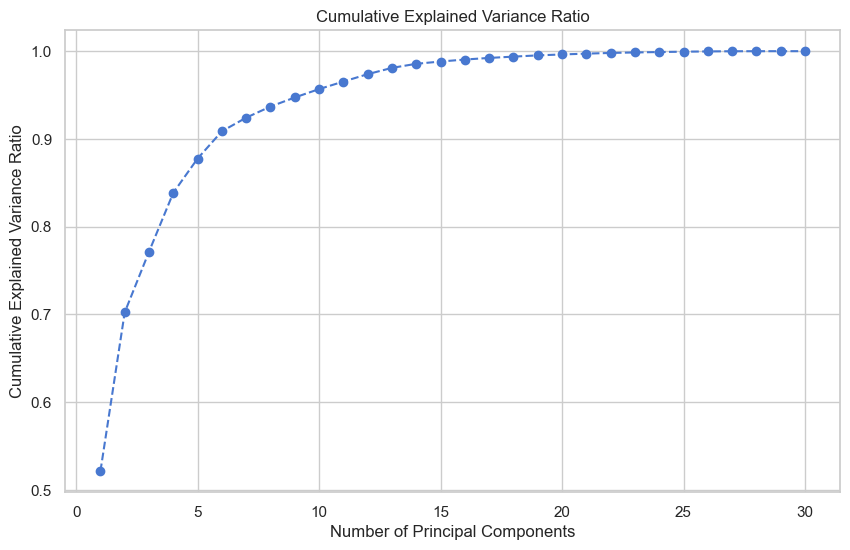

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [ ]:
# Choosing the number of components based on the plot. For example, we want to retain 95% of the variance
desired_explained_variance_ratio = 0.95
num_components = np.argmax(cumulative_variance_ratio >= desired_explained_variance_ratio) + 1

pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)

X_test_pca = pca.transform(X_test)

print(f"Number of components selected: {num_components}")

Number of components selected: 10


## [Build model, tune hyperparameters](#Build-model,-tune-hyperparameters)

In [ ]:
print(list_of_best_features)

['area_worst', 'area_mean', 'area_se', 'perimeter_worst', 'perimeter_mean', 'radius_worst', 'radius_mean', 'perimeter_se', 'texture_worst', 'texture_mean', 'concavity_worst', 'radius_se', 'concavity_mean']


In [ ]:
X = df[list_of_best_features]
y = df.diagnosis

scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.25, random_state=42)

# Train a Decision Tree classifier with different max_depth values
best_depth = 0 
best_accuracy = 0

for max_depth in range(3, 20):
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    fit = clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Evaluate the performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Max Depth: {max_depth}, Accuracy: {accuracy:.4f}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = max_depth

print(f'best depth: {best_depth}')

Max Depth: 3, Accuracy: 0.9580
Max Depth: 4, Accuracy: 0.9720
Max Depth: 5, Accuracy: 0.9650
Max Depth: 6, Accuracy: 0.9580
Max Depth: 7, Accuracy: 0.9510
Max Depth: 8, Accuracy: 0.9650
Max Depth: 9, Accuracy: 0.9650
Max Depth: 10, Accuracy: 0.9650
Max Depth: 11, Accuracy: 0.9650
Max Depth: 12, Accuracy: 0.9650
Max Depth: 13, Accuracy: 0.9650
Max Depth: 14, Accuracy: 0.9650
Max Depth: 15, Accuracy: 0.9650
Max Depth: 16, Accuracy: 0.9650
Max Depth: 17, Accuracy: 0.9650
Max Depth: 18, Accuracy: 0.9650
Max Depth: 19, Accuracy: 0.9650
best depth: 4


In [ ]:
clf = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
fit = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

## [Evaluate Model](#Evaluate-Model)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='M')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(class_report)


Accuracy: 0.9720
Precision: 0.9808
Recall: 0.9720
F1 Score: 0.9719

Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        89
           M       0.98      0.94      0.96        54

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



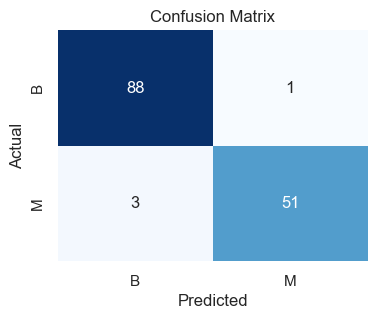

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()